In [1]:
import pandas as pd
import os
import requests
import bs4 as bs
import nltk
import re
from nltk.corpus import words, stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, sent_tokenize, pos_tag
#from gensim import corpora
import spacy
#spacy.load('en')
from spacy.lang.en import English

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
urls = ['https://www.sec.gov/Archives/edgar/data/320193/000032019318000070/a10-qq220183312018.htm',
       'https://www.sec.gov/Archives/edgar/data/6201/000000620118000016/aalq110-q033118.htm',
       'https://www.sec.gov/Archives/edgar/data/8177/000114036118022936/form10q.htm',
       'https://www.sec.gov/Archives/edgar/data/1158114/000155837018004322/aaoi-20180331x10q.htm',
       'https://www.sec.gov/Archives/edgar/data/824142/000082414216000225/aaon10-qq32016.htm',
       'https://www.sec.gov/Archives/edgar/data/881890/000114036117041851/form10q.htm',
       'https://www.sec.gov/Archives/edgar/data/351569/000035156918000007/abcb03-31x201810xq.htm',
       'https://www.sec.gov/Archives/edgar/data/1466815/000146681518000038/abcd-33118x10q.htm',
       'https://www.sec.gov/Archives/edgar/data/1157377/000115737717000016/abco-2017930x10q.htm',
       'https://www.sec.gov/Archives/edgar/data/894405/000155837017008566/arcb-20170930x10q.htm',
        'https://www.sec.gov/Archives/edgar/data/1409012/000119312510179509/d10q.htm',
        'https://www.sec.gov/Archives/edgar/data/874501/000087450118000065/a02-014ambcx20180331x10q.htm',
        'https://www.sec.gov/Archives/edgar/data/815094/000156459016022298/abmd-10q_20160630.htm',
        'https://www.sec.gov/Archives/edgar/data/1070494/000156459017022271/acad-10q_20170930.htm',
        'https://www.sec.gov/Archives/edgar/data/817473/000081747316000163/acas10q93016.htm'        
       ]

In [3]:
url = 'https://www.sec.gov/Archives/edgar/data/6201/000000620118000016/aalq110-q033118.htm'

In [4]:
def get_texts_from_url(url):
    main_page = str(requests.get(url).text)
    page_soup = bs.BeautifulSoup(main_page, 'html.parser')
    divs = page_soup.find_all('div')
    all_text = []
    for div in divs:
        text = div.getText()
        if len(text) > 200 and text[0] != '\xa0':
            all_text.append(text)
    return all_text

In [5]:
def combine_text(text):
    file = ""
    for i in range(len(text)):
        ## removes all the /xa0 /n /t garbage and some extra spaces
        cleaner_text = re.sub('\s+', ' ', text[i]).strip()
        file = file + " " + cleaner_text
        
    return file

In [6]:
def get_all_files(urls):
    all_files = []
    for url in urls:
        text = get_texts_from_url(url)
        file = combine_text(text)
        
        all_files.append(file)
        
    return all_files

## Getting the nouns

In [25]:
en_stop = nltk.corpus.stopwords.words('english')
en_stop.extend(more_stop_words)
parser = English()

def tokenize(text):
    '''
    Separates each word from the others, making them lower case and removing URLs and possible screen names that show up.
    '''

    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def prepare_text(text):
    '''
    Tokenizes the text, removes short words, removes stop words, and then gets the lemma of each word.
    '''

    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    
    pos_tags = nltk.pos_tag(tokens)
    tokens = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1][0] == "N"]
    
    final_text = ""
    
    #for token in tokens:
    #    final_text = final_text + " " + token
    
    ## do we want lemma?
    ##tokens = [get_lemma(token) for token in tokens]
    return tokens

In [8]:
all_files = get_all_files(urls)

In [9]:
all_files[0]

' California 94-2404110(State or other jurisdictionof incorporation or organization) (I.R.S. Employer Identification No.) One Apple Park WayCupertino, California 95014(Address of principal executive offices) (Zip Code) California 94-2404110(State or other jurisdictionof incorporation or organization) (I.R.S. Employer Identification No.) One Apple Park WayCupertino, California 95014(Address of principal executive offices) (Zip Code) Indicate by check mark whether the Registrant (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the Registrant was required to file such reports), and (2) has been subject to such filing requirements for the past 90 days. Indicate by check mark whether the Registrant has submitted electronically and posted on its corporate Web site, if any, every Interactive Data File required to be submitted and posted pursuant to Rule 405 of Regulation

In [18]:
prepare_text(all_files[0])

['california',
 'jurisdictionof',
 'incorporation',
 'organization',
 'i.r.s.',
 'employer',
 'identification',
 'apple',
 'waycupertino',
 'executive',
 'offices',
 'jurisdictionof',
 'incorporation',
 'organization',
 'i.r.s.',
 'employer',
 'identification',
 'apple',
 'waycupertino',
 'executive',
 'offices',
 'registrant',
 'reports',
 'section',
 'securities',
 'exchange',
 'registrant',
 'reports',
 'filing',
 'requirements',
 'registrant',
 'interactive',
 'regulation',
 'chapter',
 'registrant',
 'submit',
 'files',
 'filer',
 'filer',
 'growth',
 'definitions',
 'filer',
 'growth',
 'exchange',
 'growth',
 'check',
 'registrant',
 'transition',
 'accounting',
 'standards',
 'section',
 'exchange',
 'apple',
 'subsidiaries',
 'apple',
 'manufactures',
 'markets',
 'communication',
 'media',
 'devices',
 'computers',
 'variety',
 'software',
 'services',
 'accessories',
 'solutions',
 'party',
 'content',
 'applications',
 'services',
 'apple',
 'watch',
 'airpods',
 'apple',
 

## LDA Visualization

In [19]:
import pyLDAvis.gensim
import warnings
import pickle
import gensim
from nltk.corpus import wordnet as wn
from gensim import corpora

warnings.filterwarnings('ignore')

/Users/michael/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [20]:
def get_topics(all_files,NUM_TOPICS,NUM_WORDS):
    '''
    prints NUM_TOPICS amount of topics for the reviews
    '''
    text_data = []
    for file in all_files:
        tokens = prepare_text(file)
        text_data.append(tokens)
        
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    ldamodel.save('model5.gensim')
    
    topics = ldamodel.print_topics(num_words=5)
    return topics

In [21]:
def get_lda_display(all_files,NUM_TOPICS = 10):
    '''
    displays a lda plot for the reviews
    '''
    text_data = []
    for file in all_files:
        tokens = prepare_text(file)
        text_data.append(tokens)

    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]

    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')

    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics(num_words=5)


    dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
    corpus = pickle.load(open('corpus.pkl', 'rb'))
    lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    #pyLDAvis.display(lda_display)
    return lda_display

In [24]:
more_stop_words = ['company','months','products','operations','income','period','sales','market','business','stock','results',
                  'revenue','shares','share','revenues','assets','statements','value','costs','product','quarter','increase',
                  'expense','customers','performance','interest','charges','price','compensation','agreement','property','amount',
                  'markets','information','expenses','facility','customer','taxes','demand','payments']

In [26]:
lda_display = get_lda_display(all_files, 10)
pyLDAvis.display(lda_display)

## KMeans and PCA plots

In [188]:
import matplotlib.pyplot as plt

In [180]:
def prepare_text_for_kmeans(text):
    '''
    Tokenizes the text, removes short words, removes stop words, and then gets the lemma of each word.
    '''

    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    
    pos_tags = nltk.pos_tag(tokens)
    tokens = [pos_tag[0] for pos_tag in pos_tags if pos_tag[1][0] == "N"]
    
    final_text = ""
    
    for token in tokens:
        final_text = final_text + " " + token
    
    ## do we want lemma?
    ##tokens = [get_lemma(token) for token in tokens]
    return final_text

In [181]:
text_data = []
for file in all_files:
    tokens = prepare_text_for_kmeans(file)
    text_data.append(tokens)

In [182]:
tfidf = TfidfVectorizer()
tfidf_model = tfidf.fit_transform(text_data)

In [183]:
tfidf_model.shape

(15, 3820)

In [186]:
kmeans4 = KMeans(n_clusters=4).fit_predict(tfidf_model)
PCA4 = PCA(n_components=2).fit_transform(tfidf_model.todense())

kmeans2 = KMeans(n_clusters=2).fit_predict(tfidf_model)
PCA2 = PCA(n_components=2).fit_transform(tfidf_model.todense())

Text(0.5, 1.0, '4 Clusters')

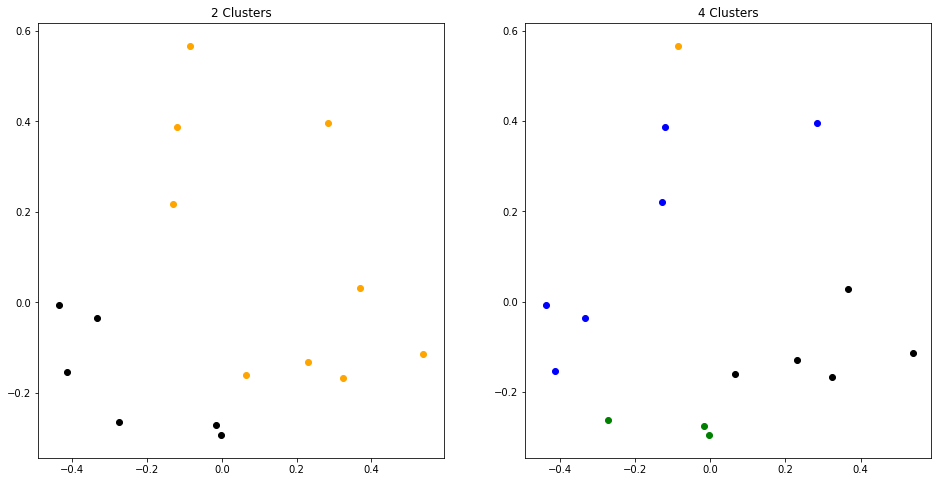

In [189]:
colors = ['orange', 'black', 'green', 'blue']

fig, ax = plt.subplots(1,2, figsize=(16,8))
for cls, col in enumerate(colors[:4]):
    cls2 = PCA2[kmeans2 == cls]
    cls4 = PCA4[kmeans4 == cls]
    ax[0].scatter(cls2[:,0], cls2[:,1], color=col)
    ax[1].scatter(cls4[:,0], cls4[:,1], color=col)
ax[0].set_title("2 Clusters")
ax[1].set_title("4 Clusters")

In [10]:
type(en_stop)

list

In [11]:
en_stop.append('blah')

In [12]:
'blah' in en_stop

True

In [14]:
en_stop.remove('blah')

In [15]:
'blah' in en_stop

False